<a href="https://colab.research.google.com/github/Nyarindaj/KARAMOJA/blob/main/Karamoja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DATA UNDERSTANDING

[Karamoja](https://en.wikipedia.org/wiki/Karamoja) , the most food-insecure region of Uganda, faces significant challenges in agricultural productivity, due to intense droughts, pest infestations, and disease outbreaks. These factors have led to low crop yields, particularly for staple crops such as sorghum and maize.

While several NGOs are actively providing technical support and farm inputs to farmers in the region, their efforts are hampered by a lack of comprehensive visibility into the overall state of food security. NGOs often rely on localized information, which limits their ability to make informed decisions.

To address this issue, Dalberg Data Insights (DDI) has been requested to develop a food security monitoring tool that can support decision-making for one of the NGOs operating in Karamoja. The tool will leverage satellite imagery to remotely measure crop yields, providing a broader and more accurate understanding of the agricultural landscape in the region.
<break>

### OVERVIEW

Dalberg Data Insights (DDI) is collaborating with NGOs in Karamoja to enhance food security monitoring through data-driven insights. The methodology developed by DDI’s agri-tech team involves using satellite images to estimate crop yields for sorghum and maize, the two main staple crops in the region. The model has already been tested for the 2017 crop season, providing a foundation for further development.

The next step in this initiative is to create an interactive visualization tool that will serve as a prototype for the final Food Security Monitoring tool. This tool will allow users, specifically the NGO staff, to visualize crop yield data at different administrative levels (district and sub-county). The dashboard should include a map and offer flexibility in terms of how data is displayed, enabling more informed decision-making and resource allocation.

<break>

### RESEARCH QUESTION
As a Data Analyst, the agri-tech team is asking you to develop an interactive visualization tool of the results for this first crop season. This visualization tool that you will develop will be used as a first mockup of the Food Security Monitoring tool that DDI will develop for the NGO.
Based on your experience, the team expects you to come up with a first draft within the coming 3 working days. They give you carte blanche in terms of structure and functionalities but they know that the client wants:
At least a map in the dashboard
The possibility of visualizing the results by district or sub-county (two administrative levels used by the NGO)


#### DATA CLEANING

In [2]:
|#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#load data1
df = pd.read_excel("Uganda_Karamoja_District_Crop_Yield_Population.xlsx")
df.head(10)

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468
5,54,NAKAPIRIPIRIT,146780,4216323900,356,1264,26372.698490,19237.333210,6425.788414,6848491,8122197
6,80,NAPAK,167625,4508782023,137,854,22944.296020,16142.015880,6543.719066,2211456,5588336


In [9]:
#load data2
df1= pd.read_excel("/content/Uganda_Karamoja_Subcounty_Crop_Yield_Population.xlsx")
df1.head(10)

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400
5,268,RENGEN,KOTIDO,41273,652744859,Y,271.185843,1047.180128,13278.520430,12964.499730,171.585704,3.515789e+06,179681.139000
6,591,KAABONG EAST,KAABONG,42221,60801942,Y,160.588525,650.123565,1021.316990,1004.647534,15.660409,1.613349e+05,10181.201000
7,592,KAABONG TOWN COUNCIL,KAABONG,38857,13071455,Y,212.210703,1229.213444,175.080527,156.503888,18.526186,3.321180e+04,22772.636430
8,593,KAABONG WEST,KAABONG,41454,67612362,Y,208.040518,1056.416068,967.336727,910.254122,56.275355,1.893697e+05,59450.189420
9,594,KALAPATA,KAABONG,99203,223116860,Y,209.809352,633.423182,2834.349905,2501.368282,331.225795,5.248105e+05,209806.097000


In [10]:
#remove duplicates df
df.duplicated().sum()

0

In [12]:
#remove duplicates df1
df1.duplicated().sum()

0

In [13]:
#check for null values
df.isnull().sum()

,0
OBJECTID,0
NAME,0
POP,0
Area,0
S_Yield_Ha,0
M_Yield_Ha,0
Crop_Area_Ha,0
S_Area_Ha,0
M_Area_Ha,0
S_Prod_Tot,0


In [ ]:
df1.isnull().sum()

OBJECTID          0
SUBCOUNTY_NAME    0
DISTRICT_NAME     0
POP               0
Area              0
Karamoja          0
S_Yield_Ha        0
M_Yield_Ha        0
Crop_Area_Ha      0
S_Area_Ha         0
M_Area_Ha         0
S_Prod_Tot        0
M_Prod_Tot        0
dtype: int64

In [16]:
#check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      7 non-null      int64  
 1   NAME          7 non-null      object 
 2   POP           7 non-null      int64  
 3   Area          7 non-null      int64  
 4   S_Yield_Ha    7 non-null      int64  
 5   M_Yield_Ha    7 non-null      int64  
 6   Crop_Area_Ha  7 non-null      float64
 7   S_Area_Ha     7 non-null      float64
 8   M_Area_Ha     7 non-null      float64
 9   S_Prod_Tot    7 non-null      int64  
 10  M_Prod_Tot    7 non-null      int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 744.0+ bytes


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID        52 non-null     int64  
 1   SUBCOUNTY_NAME  52 non-null     object 
 2   DISTRICT_NAME   52 non-null     object 
 3   POP             52 non-null     int64  
 4   Area            52 non-null     int64  
 5   Karamoja        52 non-null     object 
 6   S_Yield_Ha      52 non-null     float64
 7   M_Yield_Ha      52 non-null     float64
 8   Crop_Area_Ha    52 non-null     float64
 9   S_Area_Ha       52 non-null     float64
 10  M_Area_Ha       52 non-null     float64
 11  S_Prod_Tot      52 non-null     float64
 12  M_Prod_Tot      52 non-null     float64
dtypes: float64(7), int64(3), object(3)
memory usage: 5.4+ KB


In [18]:
df.shape

(7, 11)

In [ ]:
df1.shape

(52, 13)

In [25]:
df.set_index(['OBJECTID'], inplace=True)
df.head()


,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
OBJECTID,,,,,,,,,,
92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468


In [26]:
df1.set_index(['OBJECTID'], inplace=True)
df1.head()

,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
OBJECTID,,,,,,,,,,,,
263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


In [29]:
#merging the 2 datasets
df_df1 = df.merge(df1, on="OBJECTID", how="outer", indicator=True)
df_df1.head()

,NAME,POP_x,Area_x,S_Yield_Ha_x,M_Yield_Ha_x,Crop_Area_Ha_x,S_Area_Ha_x,M_Area_Ha_x,S_Prod_Tot_x,M_Prod_Tot_x,...,Area_y,Karamoja,S_Yield_Ha_y,M_Yield_Ha_y,Crop_Area_Ha_y,S_Area_Ha_y,M_Area_Ha_y,S_Prod_Tot_y,M_Prod_Tot_y,_merge
OBJECTID,,,,,,,,,,,,,,,,,,,,,
92,ABIM,90385.0,2.771977e+09,449.0,1040.0,5470.068394,3277.295971,1848.621855,1471506.0,1922567.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
96,AMUDAT,101790.0,1.643583e+09,205.0,1297.0,5765.443719,2973.423860,2733.661014,609552.0,3545558.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,KAABONG,627057.0,7.373606e+09,279.0,945.0,28121.672530,20544.194960,7394.416334,5731830.0,6987723.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
85,KOTIDO,243157.0,3.641540e+09,331.0,1148.0,53032.649450,50247.443900,1751.372284,16631904.0,2010575.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5,MOROTO,127811.0,3.570161e+09,128.0,355.0,5954.814048,4741.748776,1190.050606,606944.0,422468.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [32]:
#replacing all the null values in the merged dataset
# converting the categorical values in the dataset first before replacing with (0)
df_df1[df_df1.select_dtypes(['category']).columns] = df_df1.select_dtypes(['category']).astype('object')

# Now replace null values with 0
df_df1.fillna(0, inplace=True)
df_df1.head()


,NAME,POP_x,Area_x,S_Yield_Ha_x,M_Yield_Ha_x,Crop_Area_Ha_x,S_Area_Ha_x,M_Area_Ha_x,S_Prod_Tot_x,M_Prod_Tot_x,...,Area_y,Karamoja,S_Yield_Ha_y,M_Yield_Ha_y,Crop_Area_Ha_y,S_Area_Ha_y,M_Area_Ha_y,S_Prod_Tot_y,M_Prod_Tot_y,_merge
OBJECTID,,,,,,,,,,,,,,,,,,,,,
92,ABIM,90385.0,2.771977e+09,449.0,1040.0,5470.068394,3277.295971,1848.621855,1471506.0,1922567.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left_only
96,AMUDAT,101790.0,1.643583e+09,205.0,1297.0,5765.443719,2973.423860,2733.661014,609552.0,3545558.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left_only
20,KAABONG,627057.0,7.373606e+09,279.0,945.0,28121.672530,20544.194960,7394.416334,5731830.0,6987723.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left_only
85,KOTIDO,243157.0,3.641540e+09,331.0,1148.0,53032.649450,50247.443900,1751.372284,16631904.0,2010575.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left_only
5,MOROTO,127811.0,3.570161e+09,128.0,355.0,5954.814048,4741.748776,1190.050606,606944.0,422468.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,left_only


#### EDA

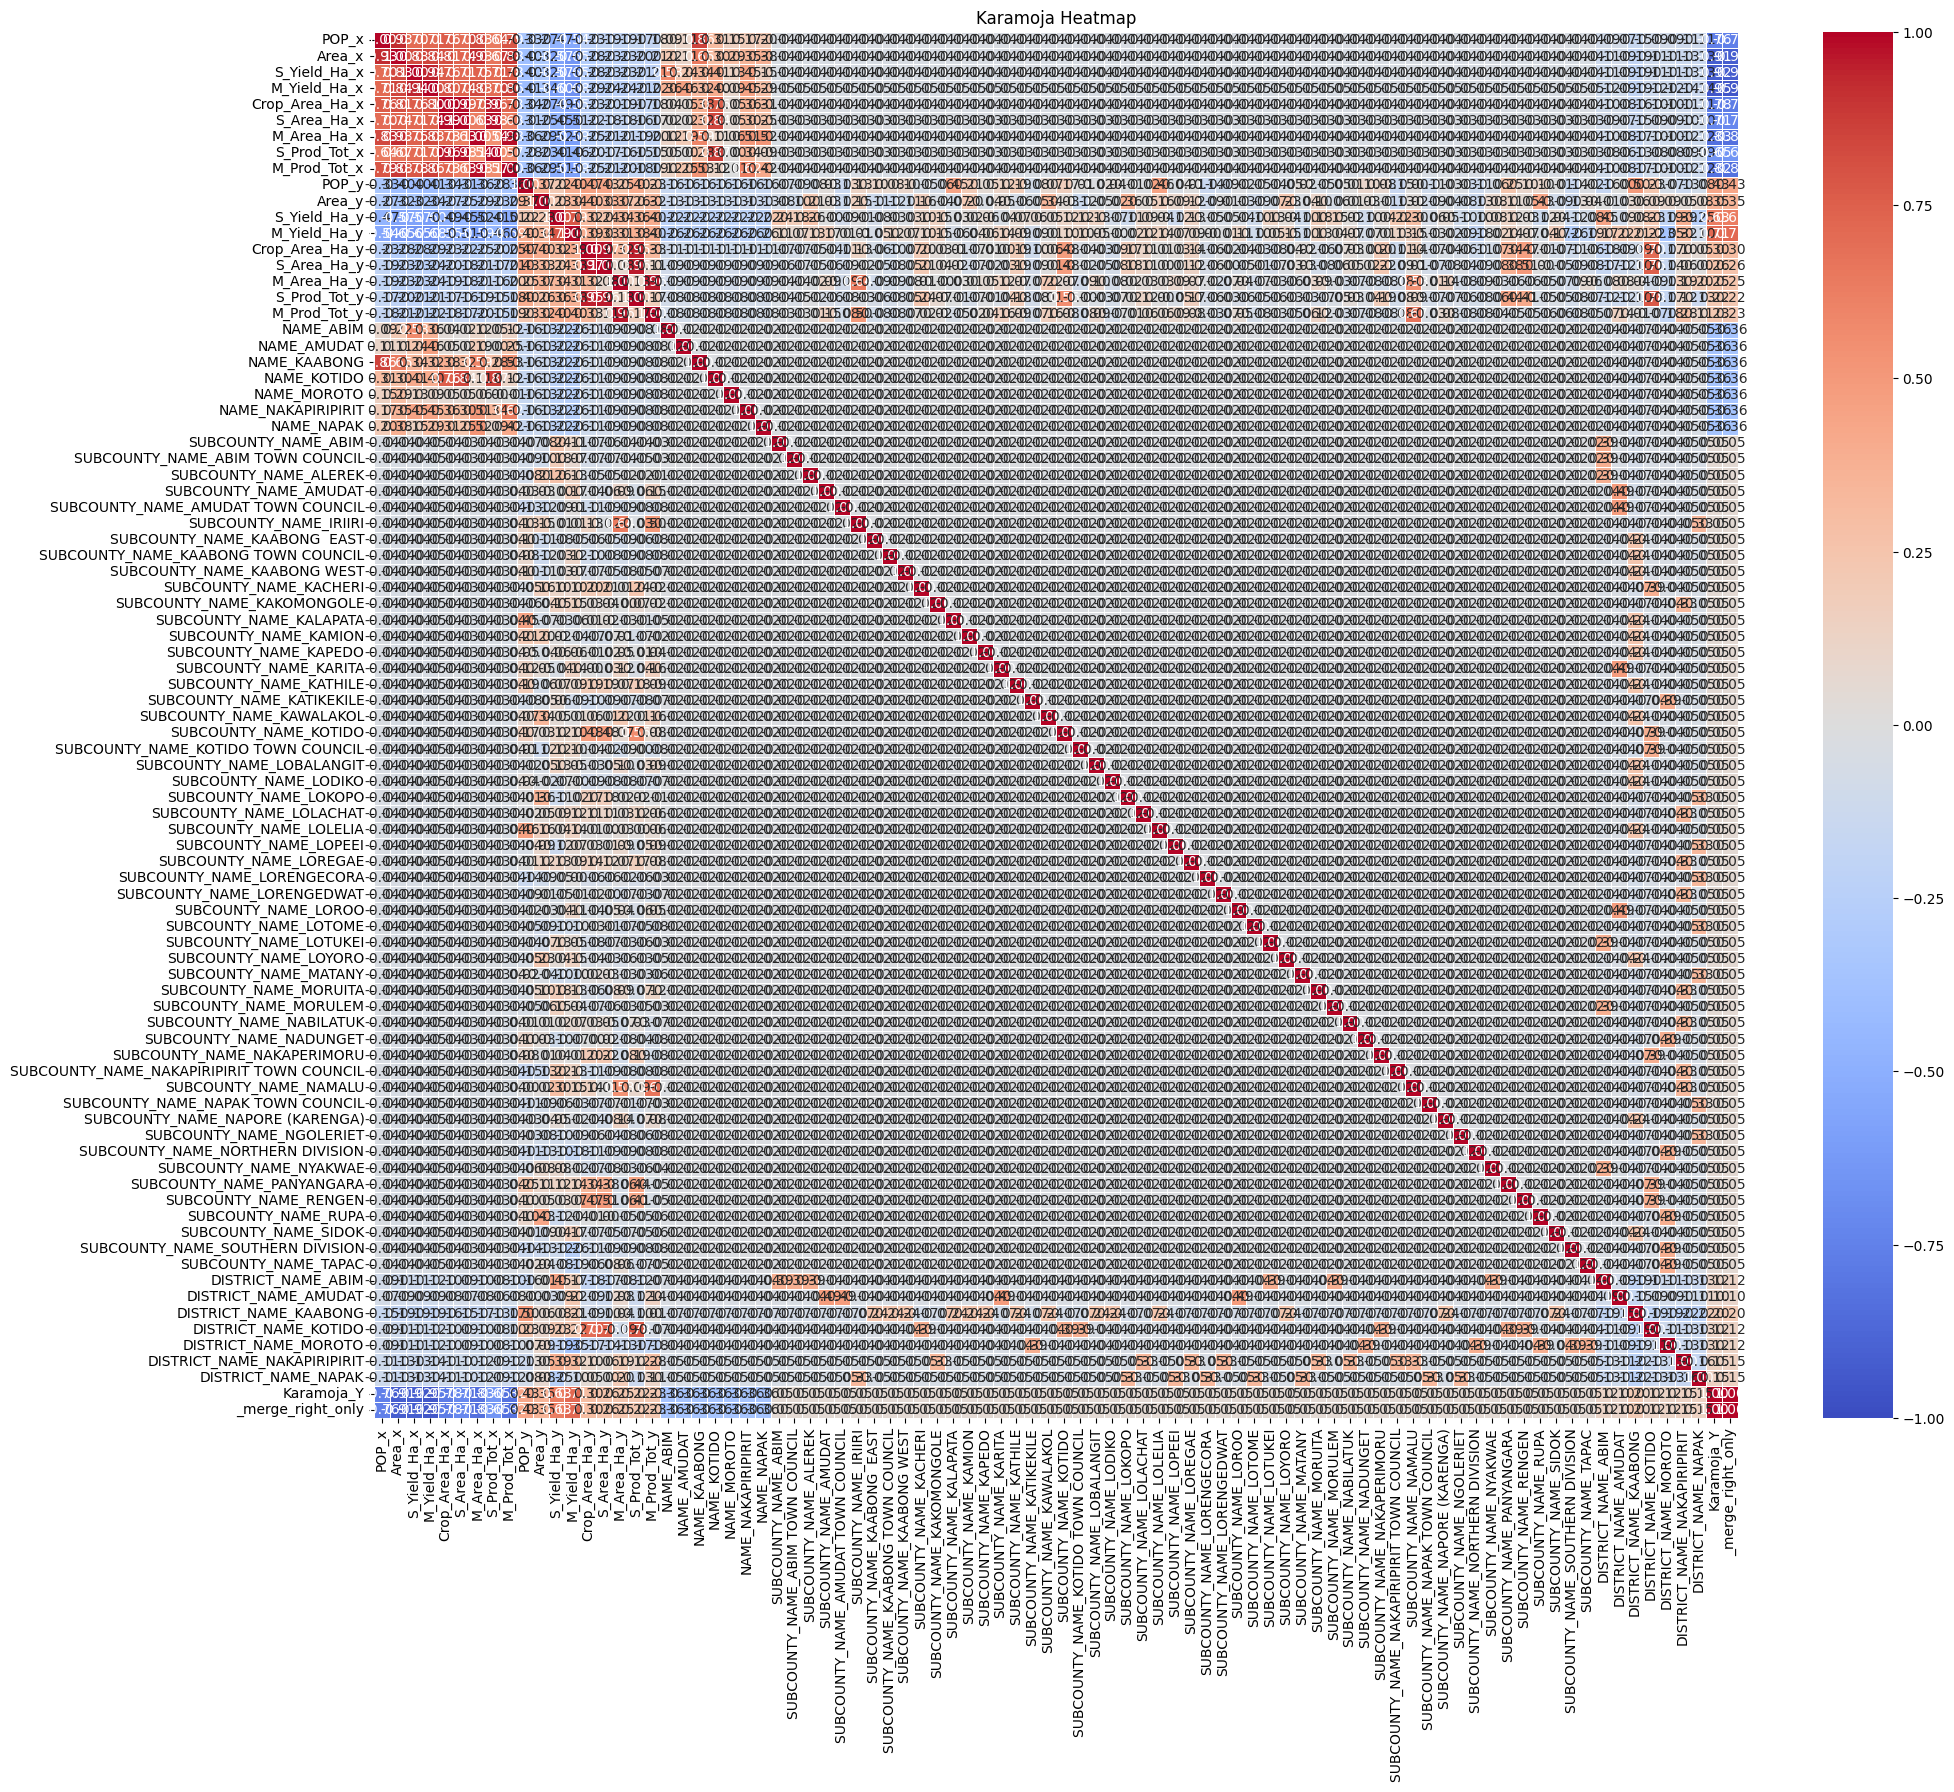

In [109]:
#plotting a heatmap to show the correlations in the dataset
import seaborn as sns
# Converting categorical values to numeric with one-hot encoding
df_encode = pd.get_dummies(df_df1, drop_first=True)
correlation_matrix = df_encode.corr()

plt.figure(figsize=(22, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f",vmin=-1, vmax=1)
plt.title('Karamoja Heatmap')
plt.show();



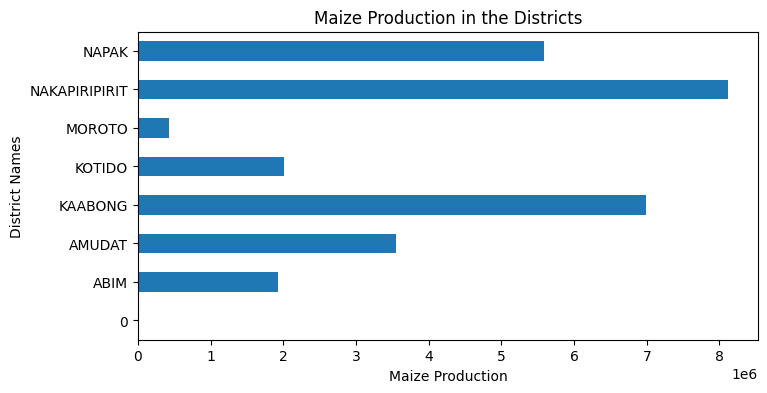

In [108]:
import matplotlib.ticker as ticker
dist_maize = df_df1.groupby('NAME')['M_Prod_Tot_x'].sum()

plt.figure(figsize=(8,4))
ax = dist_maize.plot(kind='barh')

#labelling
plt.title('Maize Production in the Districts')
plt.xlabel('Maize Production')
plt.ylabel('District Names')

plt.show();


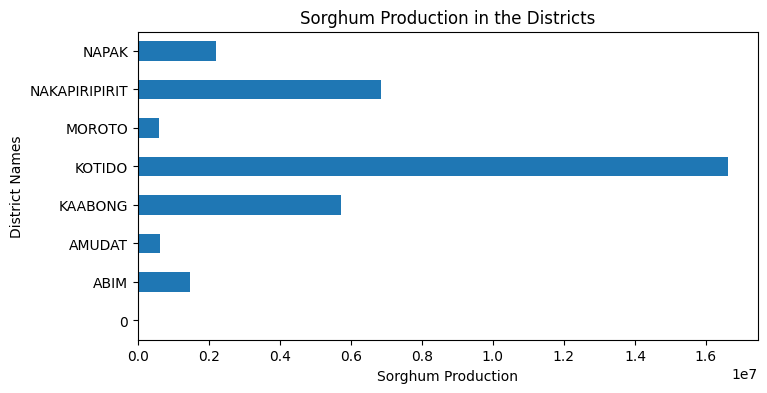

In [106]:
import matplotlib.ticker as ticker
dist_sorgh = df_df1.groupby('NAME')['S_Prod_Tot_x'].sum()

plt.figure(figsize=(8,4))
ax = dist_sorgh.plot(kind='barh')

#labelling
plt.title('Sorghum Production in the Districts')
plt.xlabel('Sorghum Production' )
plt.ylabel('District Names')

plt.show();


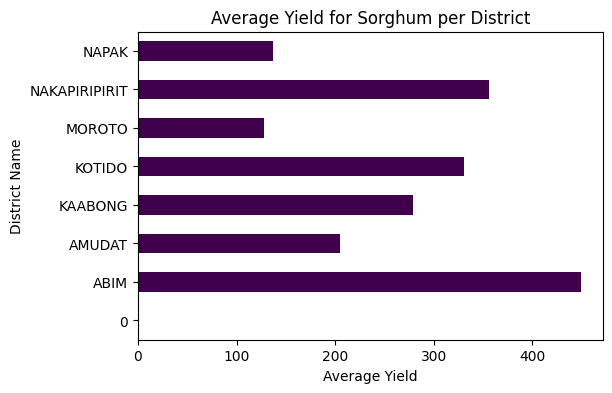

In [102]:
avg_yield_per_district = df_df1.groupby('NAME')['S_Yield_Ha_x'].mean()

plt.figure(figsize=(6,4))
ax = avg_yield_per_district.plot(kind='barh', colormap='PRGn')
#labelling
plt.title('Average Yield for Sorghum per District')
plt.xlabel('Average Yield')
plt.ylabel('District Name')


plt.show();


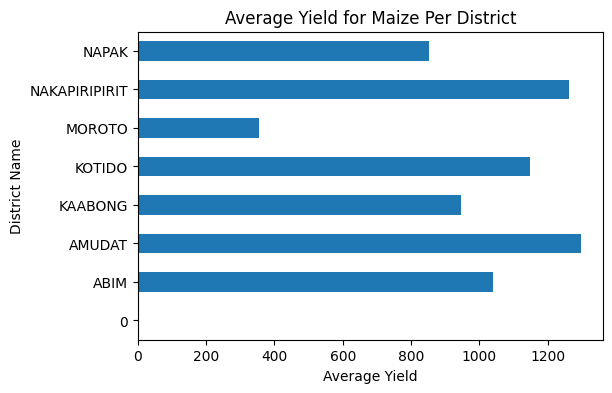

In [104]:
avg_maize_per_district = df_df1.groupby('NAME')['M_Yield_Ha_x'].mean()

plt.figure(figsize=(6,4))
ax = avg_maize_per_district.plot(kind='barh')
#labelling
plt.title('Average Yield for Maize Per District')
plt.xlabel('Average Yield')
plt.ylabel('District Name')


plt.show();


In [45]:
from google.colab import files
df_df1.to_csv('df_df1.csv')
files.download('df_df1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### CONCLUSION
The analysis reveals that maize generally exhibits higher crop yields compared to sorghum. Notably, maize has shown exceptional performance in Nakapiripirit, while sorghum has demonstrated strong yields in Kotido. Additionally, certain regions exhibit significant potential for achieving higher yields for both crops.

</break>


#### RECOMMENDATIONS
* Focus on expanding maize cultivation in areas like Amudat where it has proven successful. Similarly, enhance sorghum production strategies in Nakapiripirit to capitalize on its strong performance.
* Conduct further research in regions showing potential for both crops to identify specific factors contributing to this potential.
* Develop and disseminate guidelines that could help improve yields in underperforming areas.
* Continuously monitor crop performance across different regions and adapt strategies based on emerging trends and data.